### 特征选择
>特征选择的目的是为了筛选出对训练数据具有分类能力的特征，提供决策树学习的效率。通常特征选择的准则是`信息增益`和`信息增益率`（信息增益比）
#### 熵`entropy`
在信息论和概率统计中，熵`entropy`表示的是随机变量不确定性的度量，即不纯度。设$X$是一个取有值的随机离散变量，其概率分布为：$$P(X=x_i)=p_i, i=1,2,...,n$$则随机变量$X$的熵定义为$$H(X)=-\sum_{i=1}^{n}p_ilogp_i$$；若果$p_i=0$，则定义0log0=0.。上式中的对数以2或者自然数`e`为底数，此时熵的单位是比特（`bit`)或者纳特（`nat`）。根据上式得知：熵和X的取值没有关系，值依赖于其分布，将X的熵记作$H(p)$，即：$$H(p)=-\sum_{i=1}^{n}p_ilogp_i$$**熵越大，随机变量的不确定就越大**，根据定义得到：$0\leq H(p) \leq log(n)$。
- 熵在信息论中代表随机变量的不确定性
- 熵越大，数据的不确定性越高
- 熵越小，数据的不确定性越小  

当随机变量只取0和1的时候，X的分布是$$P(X=1)=p, P(X=0)=1-p,  0 \leq p \leq 1$$，那么对应的熵$H(p)$为$$H(p)=-plog_2p-(1-p)log_2(1-p)
- 当$p=0或1$时，$H(p)=0$，此时随机变量完全没有不确定性。
- 当$p=0.5$时，熵取值最大，此时不确定最大

#### 条件熵
条件熵$H(Y|X)$表示在已知随机变量X的条件下随机变量Y的不确定性。此时，条件熵$H(Y|X)$，定义为X给定条件下Y的条件概率分布的熵对X的期望：$$H(Y|X)= \sum _{x=1}^{n}p_iH(Y|X=x_i) $$在这里，$p_i=P(X=x_i), i=1,2,3,...,n$

规定：由数据统计（特别是极大似然估计）得到的熵和条件熵，分别称之为经验熵`empirical entropy` 和经验条件熵 `empirical conditional entropy`，并且规定0log0=0。

#### 信息增益 `information gain`
信息增益表示的是：得知X的信息而是的类Y的信息的不确定性较少的程度。信息增益定义如下：
>特征A对训练数据集D的信息增益为$g(D,A)$，定义为集合D的经验熵$H(D)$与给定条件下D的经验熵$H(D|A)$之差，记为$$g(D,A)= H(D)-H(D|A)$$一般情况下，熵和条件熵的差称之为互信息`mutual information`。决策树模型中学习的`信息增益` == 训练数据中`类与特征`的互信息。
- 决策树学习应用信息增益来选择特征
- 信息增益就是表示由于特征使得对训练数据集的分类的不确定减少的程度
- 信息增益依赖于特征，不同的特征往往具有不同的信息增益
- 信息增益大的特征具有更强的分类能力
- 根据信息增益来选择特征的方法：
    - 对于训练数据集，计算每个特征的信息增益
    - 比较每个信息增益的大小
    - 选取信息增益最大的特征进行分类
    
#### 信息增益算法
>假设训练数据集为D，|D|表示样容量即本数。数据集中总共有K个类$C_k$, $k=1,2,3,...,K$，|$C_K$|为样本$C_k$的个数，则$$\sum _{k=1}^{K}|C_k|=|D|$$设特征A有n个不同的取值：$\{a_1,a_2,...a_n\}$,根据特征A将数据集D分成n个不同的子集$D_1, D_2, ...,D_n$，其中|$D_i$|表示$D_i$的样本数，$\sum _{i=1}^{n}|D_i| =|D|$。记子集$D_i$中属于类$C_k$的样本的集合为$D_ik$，即：$D_{ik}=D_i \cap C_k$，$|D_{ik}|$为$D_{ik}$的样本个数。

- 训练数据集：D
- 样本容量：$|D|$
- 数据中类的总数：K个类，$C_k$, 其中$k=1,2,3,...,K$
- 所有类`Y`的总数满足：$\sum _{k=1}^{K}|C_k|=|D|$
- 训练数据总特征`X`数：n，$\{a_1,a_2,...a_n\}$
- 根据某个类A将数据集D划分为n个不同的子集：$D_1, D_2, ...,D_n$
- 所有子集之和满足：$D_{ik}=D_i \cap C_k$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def entropy(p):
    return - p * np.log(p) - (1 - p) * np.log(1 - p)

In [11]:
x = np.linspace(0.01, 0.99, 200)

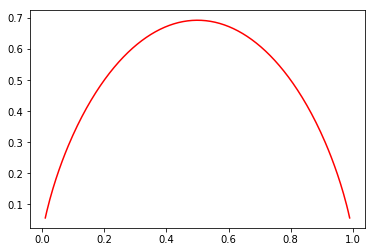

In [12]:
# 结果以x=0.5为对称轴，当两个取值都是0.5时，最不确定，熵越大
# 结果为0或者1的时候，最确定，熵最小
plt.plot(x, entropy(x), c='r')
plt.show()